<a href="https://colab.research.google.com/github/ganesh3/opencv-work/blob/main/opencv_basic_operations_pyimagesearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Morphological Operations

In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/morphological-operations/morphological-operations.zip
!unzip -qq morphological-operations.zip
%cd morphological-operations

--2021-10-10 08:44:14--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/morphological-operations/morphological-operations.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.146.154
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.146.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 359720 (351K) [application/zip]
Saving to: ‘morphological-operations.zip’

morphological-opera 100%[===================>] 351.29K  1.03MB/s    in 0.3s    

2021-10-10 08:44:15 (1.03 MB/s) - ‘morphological-operations.zip’ saved [359720/359720]

/content/morphological-operations


In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import cv2
import numpy as np
import imutils

In [2]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
# construct the argument parser and parse the arguments
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", required=True,
#	help="path to input image")
#args = vars(ap.parse_args())

# since we are using Jupyter Notebooks we can replace our argument parsing code with *hard coded* arguments and values
args = {
	"image": "pyimagesearch_logo.png"
}

In [ ]:
type(args)

dict

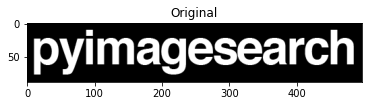

In [ ]:
# load the image, convert it to grayscale, and display it to our screen
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Original", image)

####Erosion

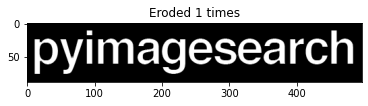

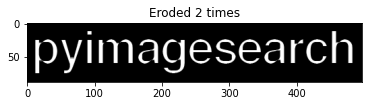

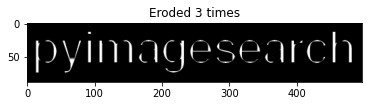

In [ ]:
# apply a series of erosions
for i in range(0,3):
  eroded = cv2.erode(gray.copy(), None, iterations = i+1)
  plt_imshow("Eroded {} times".format(i+1), eroded)

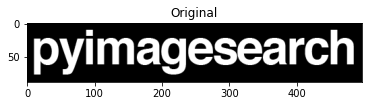

In [ ]:
# display the original image
plt_imshow("Original", image)

####Dilation

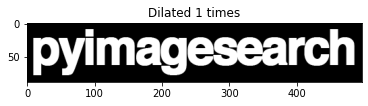

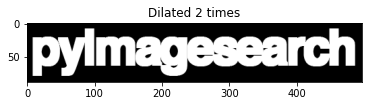

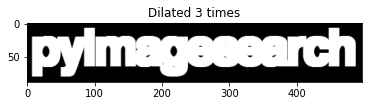

In [ ]:
# apply a series of dilations
for i in range(0,3):
  dilated = cv2.dilate(gray.copy(), None, iterations = i +1)
  plt_imshow("Dilated {} times".format(i+1), dilated)

####Opening

In [ ]:
args = {
	"image": "pyimagesearch_logo_noise.png"
}

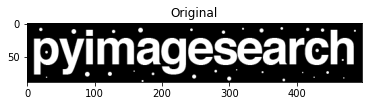

In [ ]:
# load the image, convert it to grayscale, and display it to our screen
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Original", image)

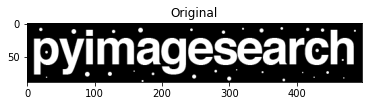

In [ ]:
# close all windows to cleanup the screen, then initialize a list of of kernels sizes that will be applied to the image
plt_imshow("Original", image)
kernelSizes = [(3, 3), (5, 5), (7, 7)]

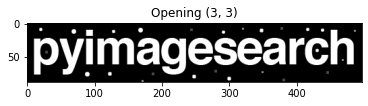

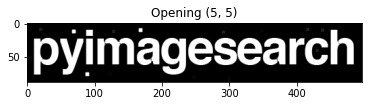

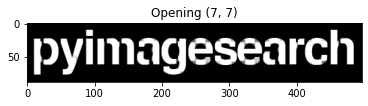

In [ ]:
#Opening is erosion followed by dilation
for kernelsize in kernelSizes:
  # construct a rectangular kernel from the current size and then apply an "opening" operation
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelsize)
  opening = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel)
  plt_imshow("Opening ({}, {})".format(kernelsize[0], kernelsize[1]), opening)

####Closing

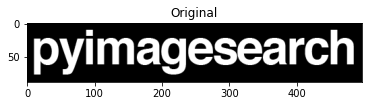

In [ ]:
# display the original image
plt_imshow("Original", image)

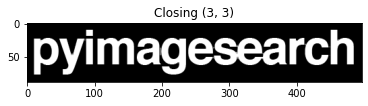

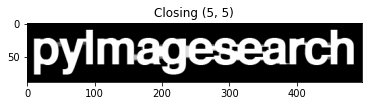

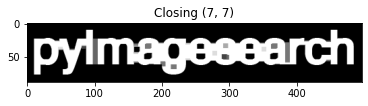

In [ ]:
#Closing is dilation followed by erosion
# loop over the kernels sizes again
for kernelsize in kernelSizes:
  # construct a rectangular kernel form the current size, but this time apply a "closing" operation
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelsize)
  closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
  plt_imshow("Closing ({}, {})".format(kernelsize[0], kernelsize[1]), closing)

####Morphological Gradient

In [ ]:
args = {
	"image": "pyimagesearch_logo.png"
}
# load the image, convert it to grayscale, and display it to our screen
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

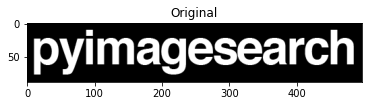

In [ ]:
# Morphological Gradient is difference between dilation and erosion useful for boundary/outline detection
# display the original image
plt_imshow("Original", image)

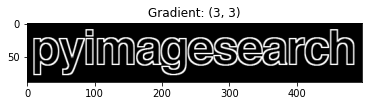

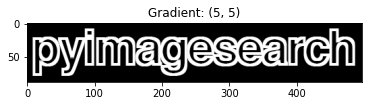

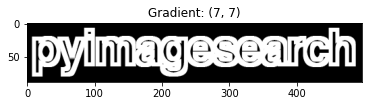

In [ ]:
# loop over the kernels a final time
for kernelSize in kernelSizes:
	# construct a rectangular kernel and apply a "morphological
	# gradient" operation to the image
	kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
	gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
	plt_imshow("Gradient: ({}, {})".format(kernelSize[0], kernelSize[1]), gradient)

###Morphological Hats

####Top Hat/White Hat

In [ ]:
args = {
	"image": "car.png"
}

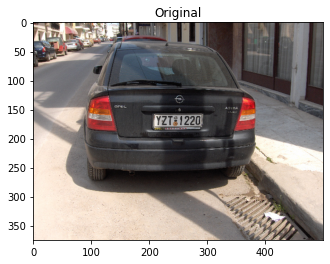

In [ ]:
# load the image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("Original", image)

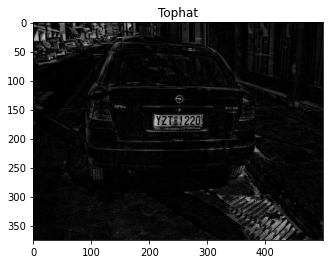

In [ ]:
# A tophat (also called a "whitehat") operation will enable us to find light regions on a dark background
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)
plt_imshow("Tophat", tophat)

####Blackhat

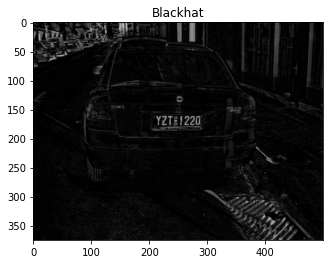

In [ ]:
# construct a rectangular kernel (13x5) and apply a blackhat operation which enables us to find dark regions on a light
# background
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, rectKernel)
plt_imshow("Blackhat", blackhat)

###Blurring
Blurring and smoothening are very important operations applied before edge detection and thresholding

In [ ]:
%cd ..

/content


In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/smoothing-and-blurring/smoothing-and-blurring.zip
!unzip -qq smoothing-and-blurring.zip
%cd smoothing-and-blurring

--2021-10-10 11:11:04--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/smoothing-and-blurring/smoothing-and-blurring.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.131.218
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.131.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174310 (170K) [application/zip]
Saving to: ‘smoothing-and-blurring.zip’

smoothing-and-blurr 100%[===================>] 170.22K   531KB/s    in 0.3s    

2021-10-10 11:11:05 (531 KB/s) - ‘smoothing-and-blurring.zip’ saved [174310/174310]

/content/smoothing-and-blurring


In [ ]:
args = {
	"image": "adrian.png"
}

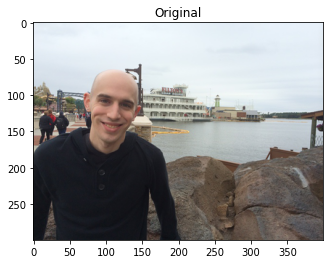

In [ ]:
# load the image, display it to our screen, and initialize a list of kernel sizes (so we can evaluate the 
# relationship between kernel size and amount of blurring)
image = cv2.imread(args["image"])
plt_imshow("Original", image)
kernelSizes = [(3, 3), (9, 9), (15, 15)]

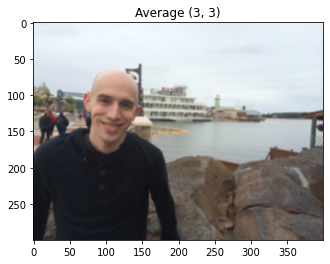

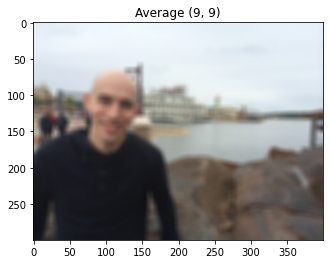

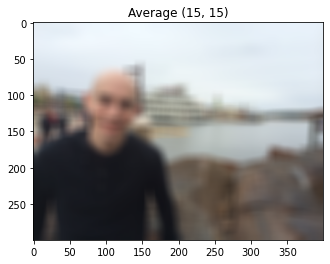

In [ ]:
# loop over the kernel sizes
for (kx, ky) in kernelSizes:
  # apply an "average" blur to the image using the current kernel size
  blurred = cv2.blur(image, (kx,ky))
  plt_imshow("Average ({}, {})".format(kx, ky), blurred)

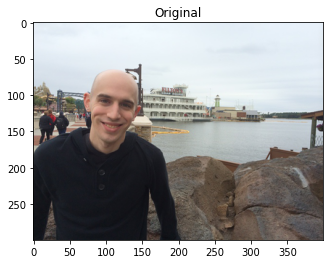

In [ ]:
# display the original image
plt_imshow("Original", image)

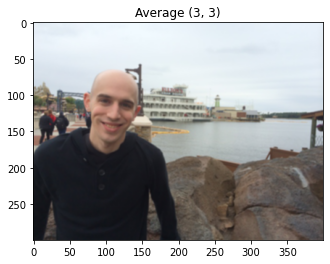

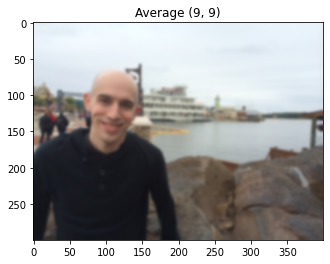

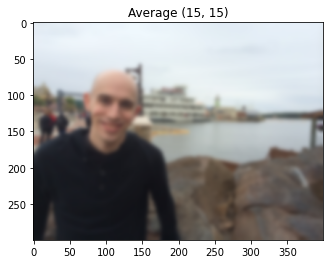

In [ ]:
# loop over the kernel sizes
for (kx, ky) in kernelSizes:
  # apply a "gaussian" blur to the image
  blurred = cv2.GaussianBlur(image, (kx, ky), 0)
  plt_imshow("Average ({}, {})".format(kx, ky), blurred)

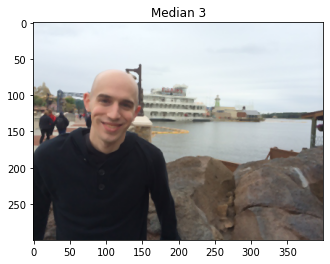

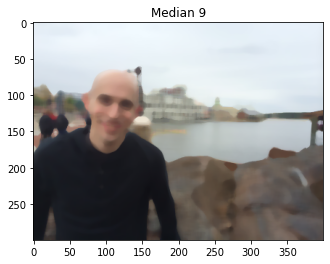

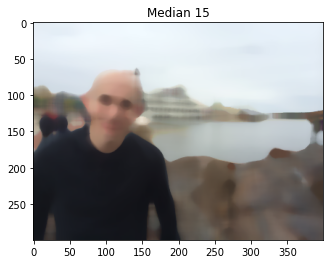

In [ ]:
# loop over the kernel sizes a final time
for k in (3, 9, 15):
	# apply a "median" blur to the image
	blurred = cv2.medianBlur(image, k)
	plt_imshow("Median {}".format(k), blurred)

###Bilateral blurring (cv2.bilateralFilter)
It reduces noice while maintaining the edges by leveraging 2 gaussian ditributions

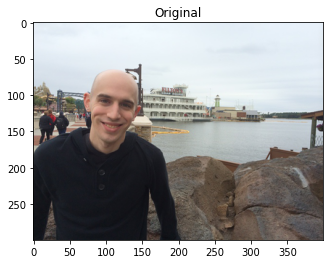

In [ ]:
# load the image, display it to our screen, and construct a list of bilateral filtering parameters 
#that we are going to explore
image = cv2.imread(args["image"])
plt_imshow("Original", image)
params = [(2, 10, 21), (8, 51, 41), (11, 59, 61)]

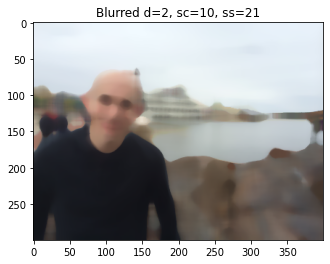

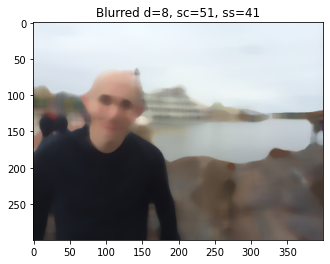

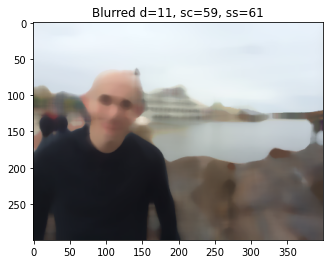

In [ ]:
# loop over the diameter, sigma color, and sigma space
for (diameter, sigmacolor, sigmaspace) in params:
  	# apply bilateral filtering to the image using the current set of parameters
    # diameter - define diameter of pixel neighborhood
    # sigmacolor - color standard deviation- a larger value means more colors in the neighbor hood will be considered when
    #   computing the blur
    # sigmaspace - A larger value signifies that pixels farther out from central pixel diameter will influence the blurring
    #   operation
    bilateral_blur = cv2.bilateralFilter(image, diameter, sigmacolor, sigmaspace)
    # show the output image and associated parameters
    title = "Blurred d={}, sc={}, ss={}".format(diameter, sigmacolor, sigmaspace)
    plt_imshow(title, blurred)

###Color Spaces

In [ ]:
%cd ..

/content


In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-color-spaces/opencv-color-spaces.zip
!unzip -qq opencv-color-spaces.zip
%cd opencv-color-spaces

--2021-10-10 12:08:27--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-color-spaces/opencv-color-spaces.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.177.57
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.177.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175388 (171K) [binary/octet-stream]
Saving to: ‘opencv-color-spaces.zip’

opencv-color-spaces 100%[===================>] 171.28K   707KB/s    in 0.2s    

2021-10-10 12:08:27 (707 KB/s) - ‘opencv-color-spaces.zip’ saved [175388/175388]

/content/opencv-color-spaces


In [ ]:
args = {
    "image": "adrian.png",
}

In [ ]:
def plt_imshow(title, image):
    # convert the image frame BGR to RGB color space and display it
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

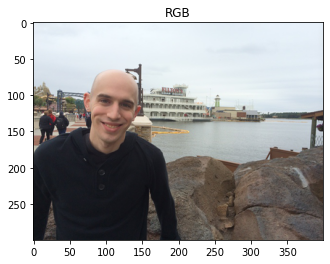

In [ ]:
# load the original image and show it
image = cv2.imread(args["image"])
plt_imshow("RGB", image)

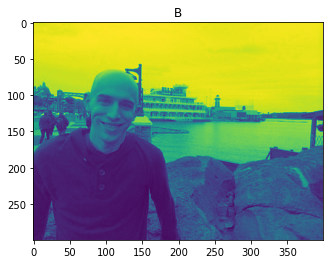

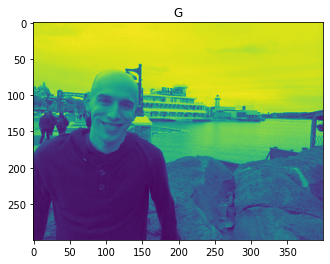

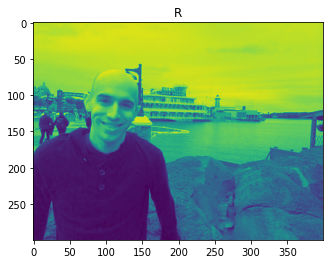

In [ ]:
# loop over each of the individual channels and display them
for (name, chan) in zip(("B", "G", "R"), cv2.split(image)):
    plt_imshow(name, chan)

In [ ]:
(B, G, R) = cv2.split(image)

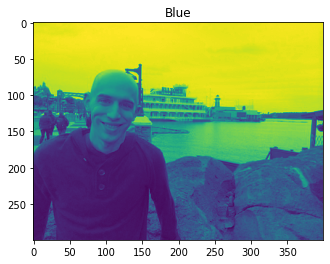

In [ ]:
plt_imshow("Blue", B)

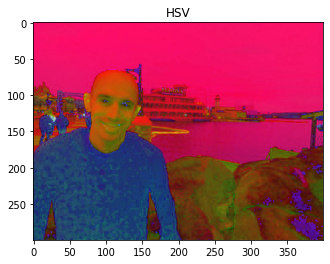

In [ ]:
# convert the image to the HSV color space and show it
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt_imshow("HSV", hsv)

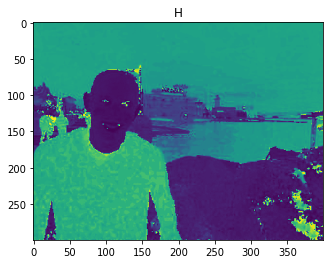

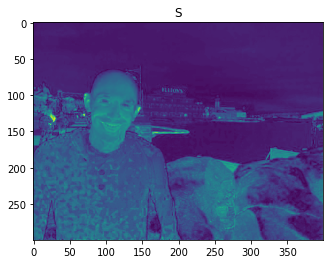

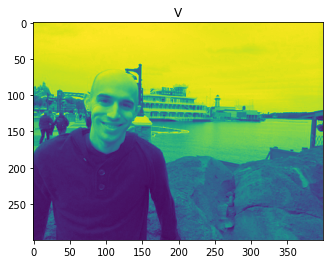

In [ ]:
# loop over each of the invidiaul channels and display them
for (name, chan) in zip(("H", "S", "V"), cv2.split(hsv)):
	plt_imshow(name, chan)

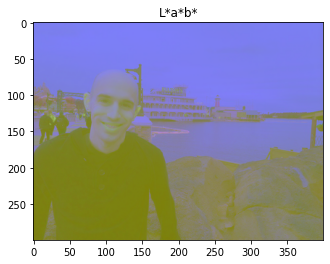

In [ ]:
# convert the image to the L*a*b* color space and show it
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
plt_imshow("L*a*b*", lab)

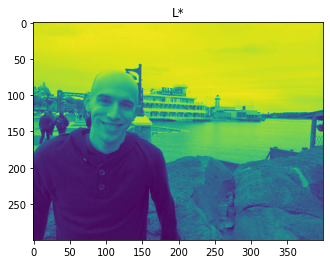

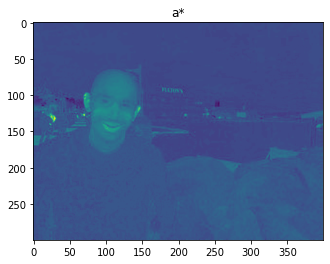

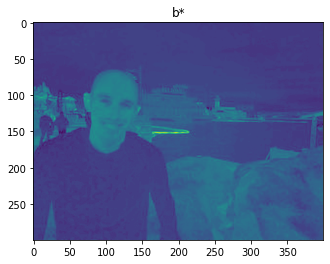

In [ ]:
# loop over each of the invidiaul channels and display them
for (name, chan) in zip(("L*", "a*", "b*"), cv2.split(lab)):
	plt_imshow(name, chan)

In [ ]:
# show the original and grayscale versions of the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape

(300, 400)

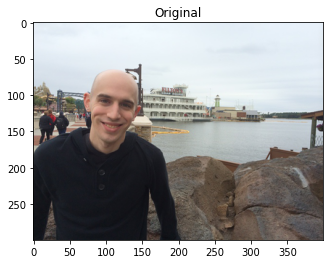

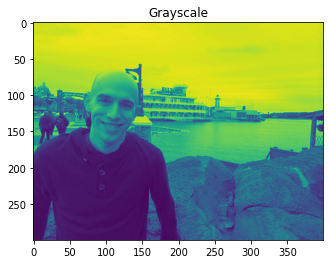

In [ ]:
plt_imshow("Original", image)
plt_imshow("Grayscale", gray)

### Basic Thresholding

In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-thresholding/opencv-thresholding.zip
!unzip -qq opencv-thresholding.zip
%cd opencv-thresholding

--2021-11-26 11:49:37--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/opencv-thresholding/opencv-thresholding.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.154.9
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.154.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 253456 (248K) [binary/octet-stream]
Saving to: ‘opencv-thresholding.zip’

opencv-thresholding 100%[===================>] 247.52K  --.-KB/s    in 0.04s   

2021-11-26 11:49:37 (5.90 MB/s) - ‘opencv-thresholding.zip’ saved [253456/253456]

/content/opencv-thresholding


In [ ]:
args = {
    "image": "images/opencv_logo.png"
}

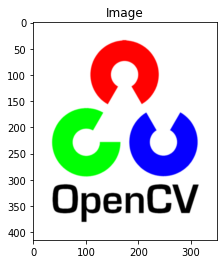

In [ ]:
image = cv2.imread(args["image"])
plt_imshow("Image", image)

In [ ]:
# convert the image to grayscale and blur it slightly
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0)

In [ ]:
# apply basic thresholding -- the first parameter is the image we want to threshold, the second value is is our threshold
# check; if a pixel value is greater than our threshold (in this case, 200), we set it to be *black, otherwise it is *white*
(T, threshinv) = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY_INV)

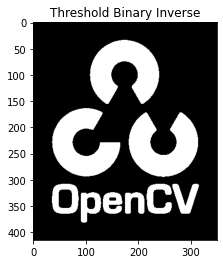

In [ ]:
plt_imshow("Threshold Binary Inverse", threshinv)

In [ ]:
# using normal thresholding (rather than inverse thresholding)
(T, thresh) = cv2.threshold(blur, 200, 255, cv2.THRESH_BINARY)

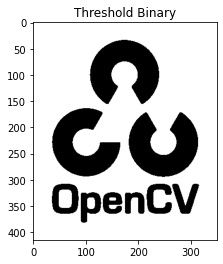

In [ ]:
plt_imshow("Threshold Binary", thresh)

In [ ]:
# visualize only the masked regions in the image
mask = cv2.bitwise_and(image, image, mask=threshinv)

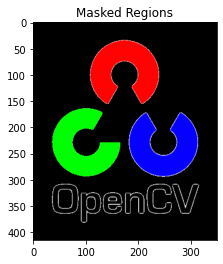

In [ ]:
plt_imshow("Masked Regions", mask)

#### Implementing Otsu thresholding with OpenCV

In [ ]:
# apply Otsu's automatic thresholding which automatically determines the best threshold value
(T, threshinvotsu) = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

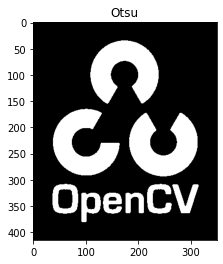

In [ ]:
plt_imshow("Otsu", threshinvotsu)

In [ ]:
print("[INFO] otsu's thresholding value: {}".format(T))

[INFO] otsu's thresholding value: 166.0


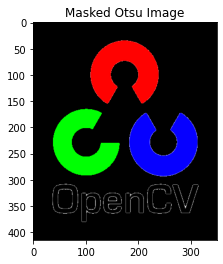

In [ ]:
maskotsu = cv2.bitwise_and(image, image, mask = threshinvotsu)
plt_imshow("Masked Otsu Image", maskotsu)

### Adaptive Thresholding

In [ ]:
!pwd

/content/opencv-thresholding


In [ ]:
%cd ..

/content


In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/adapative-thresholding/adapative-thresholding.zip
!unzip -qq adapative-thresholding.zip
%cd adapative-thresholding

--2021-11-26 13:43:43--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/adapative-thresholding/adapative-thresholding.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.179.106
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.179.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118262 (115K) [binary/octet-stream]
Saving to: ‘adapative-thresholding.zip’

adapative-threshold 100%[===================>] 115.49K  --.-KB/s    in 0.04s   

2021-11-26 13:43:43 (2.68 MB/s) - ‘adapative-thresholding.zip’ saved [118262/118262]

/content/adapative-thresholding


In [ ]:
args = {
	"image": "steve_jobs.png"
}

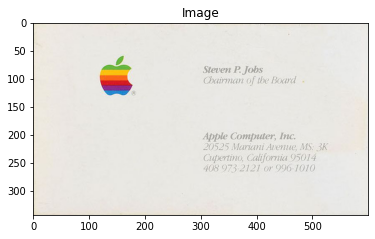

In [ ]:
# load the image and display it
image_adt = cv2.imread(args["image"])
plt_imshow("Image", image_adt) 

In [ ]:
# convert the image to grayscale and blur it slightly
gray_adt = cv2.cvtColor(image_adt, cv2.COLOR_BGR2GRAY)
blur_adt = cv2.GaussianBlur(gray_adt, (7,7), 0)

In [ ]:
# apply simple thresholding with a hardcoded threshold value
(T, threshinvadt) = cv2.threshold(blur_adt, 230, 250, cv2.THRESH_BINARY_INV)

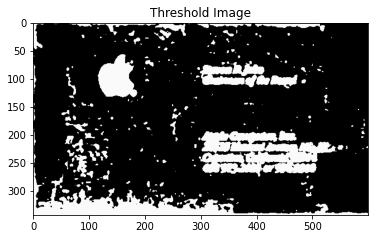

In [ ]:
plt_imshow("Threshold Image", threshinvadt)

In [ ]:
# apply Otsu's automatic thresholding
(T, threshotsuadt) = cv2.threshold(blur_adt, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

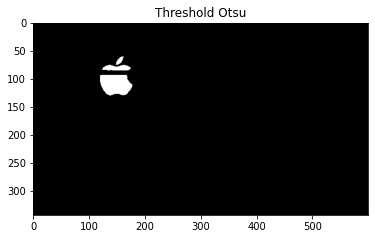

In [ ]:
plt_imshow("Threshold Otsu", threshotsuadt)

In [ ]:
# instead of manually specifying the threshold value, we can use adaptive thresholding to examine 
# neighborhoods of pixels and adaptively threshold each neighborhood
adaptive = cv2.adaptiveThreshold(blur_adt, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 21, 4)

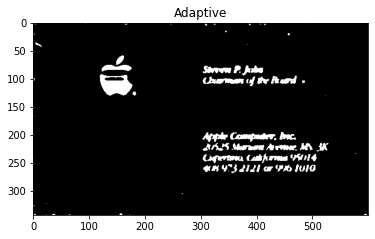

In [ ]:
plt_imshow("Adaptive", adaptive)

In [ ]:
# perform adaptive thresholding again, this time using a Gaussian weighting versus a simple mean 
# to compute our local threshold value
adaptive_wt = cv2.adaptiveThreshold(blur_adt, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)

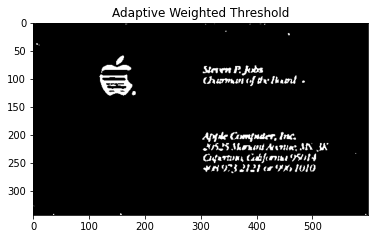

In [ ]:
plt_imshow("Adaptive Weighted Threshold", adaptive_wt)

In [ ]:
mask_adt = cv2.bitwise_and(image_adt, image_adt, mask=adaptive)

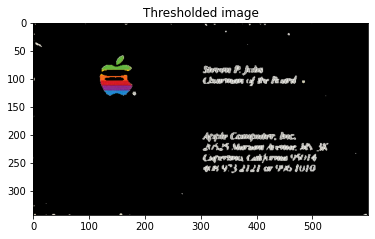

In [ ]:
plt_imshow("Thresholded image", mask_adt)

### Kernels

In [ ]:
% cd ..

/content


In [ ]:
!wget https://www.pyimagesearch.com/wp-content/uploads/2016/06/convolutions-opencv.zip
!unzip -qq convolutions-opencv.zip
%cd convolutions-opencv

--2021-12-04 11:06:58--  https://www.pyimagesearch.com/wp-content/uploads/2016/06/convolutions-opencv.zip
Resolving www.pyimagesearch.com (www.pyimagesearch.com)... 172.104.211.12
Connecting to www.pyimagesearch.com (www.pyimagesearch.com)|172.104.211.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151287 (148K) [application/zip]
Saving to: ‘convolutions-opencv.zip’

convolutions-opencv 100%[===================>] 147.74K  --.-KB/s    in 0.04s   

2021-12-04 11:06:58 (3.80 MB/s) - ‘convolutions-opencv.zip’ saved [151287/151287]

/content/convolutions-opencv


In [ ]:
# import the necessary packages
from skimage.exposure import rescale_intensity

In [ ]:
args = {
	"image": "3d_pokemon.png"
}

In [ ]:
def convolve(image, kernel):
	# grab the spatial dimensions of the image, along with
	# the spatial dimensions of the kernel
	(iH, iW) = image.shape[:2]
	(kH, kW) = kernel.shape[:2]

	# allocate memory for the output image, taking care to
	# "pad" the borders of the input image so the spatial
	# size (i.e., width and height) are not reduced
	pad = (kW - 1) // 2
	image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
		cv2.BORDER_REPLICATE)
	output = np.zeros((iH, iW), dtype="float32")

	# loop over the input image, "sliding" the kernel across
	# each (x, y)-coordinate from left-to-right and top to
	# bottom
	for y in np.arange(pad, iH + pad):
		for x in np.arange(pad, iW + pad):
			# extract the ROI of the image by extracting the
			# *center* region of the current (x, y)-coordinates
			# dimensions
			roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

			# perform the actual convolution by taking the
			# element-wise multiplicate between the ROI and
			# the kernel, then summing the matrix
			k = (roi * kernel).sum()

			# store the convolved value in the output (x,y)-
			# coordinate of the output image
			output[y - pad, x - pad] = k

	# rescale the output image to be in the range [0, 255]
	output = rescale_intensity(output, in_range=(0, 255))
	output = (output * 255).astype("uint8")

	# return the output image
	return output

In [ ]:
# construct average blurring kernels used to smooth an image
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

In [ ]:
# construct a sharpening filter
sharpen = np.array(([0, -1, 0], [-1, 5, -1], [0, -1, 0]), dtype="int")

In [ ]:
# construct the Laplacian kernel used to detect edge-like regions of an image
laplacian = np.array(([-1, 0, 1], [-1, -4, -1], [-1, 0, 1]), dtype="int")

In [ ]:
# construct the Sobel x-axis kernel
sobelX = np.array(([-1, 0, 1], [-2, 0, 2], [-1, 0, 1]), dtype="int")

In [ ]:
# construct the Sobel y-axis kernel
sobelY = np.array(([-1, -2, -1], [0, 0, 0], [1, 2, 1]), dtype="int")

In [ ]:
# construct the kernel bank, a list of kernels we're going to apply using both our custom `convole` function and OpenCV's `filter2D` function
kernelBank = (("smallBlur", smallBlur), ("largeBlur", largeBlur), ("sharpen", sharpen), ("laplacian", laplacian), ("sobel_x", sobelX), ("sobel_y", sobelY))

In [ ]:
kernelBank

(('smallBlur',
  array([[0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
          0.02040816, 0.02040816],
         [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
          0.02040816, 0.02040816],
         [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
          0.02040816, 0.02040816],
         [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
          0.02040816, 0.02040816],
         [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
          0.02040816, 0.02040816],
         [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
          0.02040816, 0.02040816],
         [0.02040816, 0.02040816, 0.02040816, 0.02040816, 0.02040816,
          0.02040816, 0.02040816]])),
 ('largeBlur',
  array([[0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
          0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
          0.00226757, 0.00226757, 0.00226757, 0.00226757, 0.00226757,
          0.00226757, 

In [ ]:
# load the input image and convert it to grayscale
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

[INFO] applying smallBlur kernel


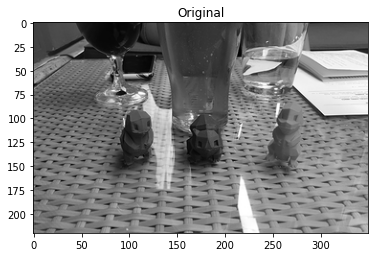

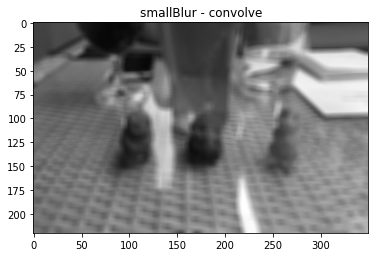

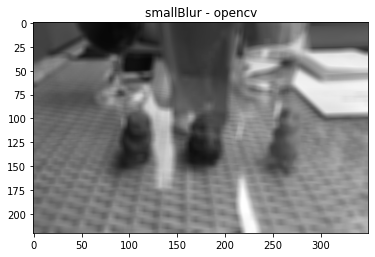

[INFO] applying largeBlur kernel


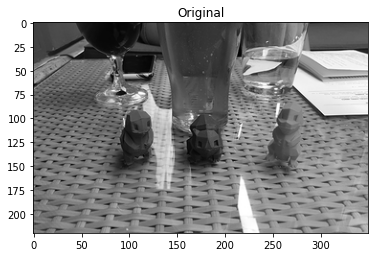

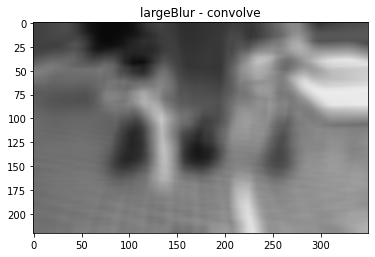

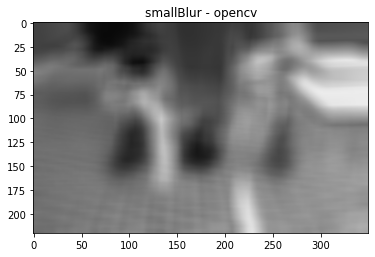

[INFO] applying sharpen kernel


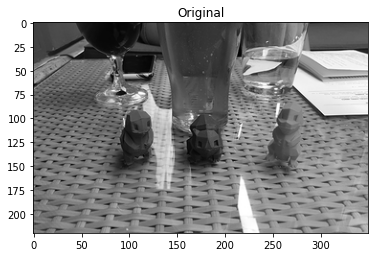

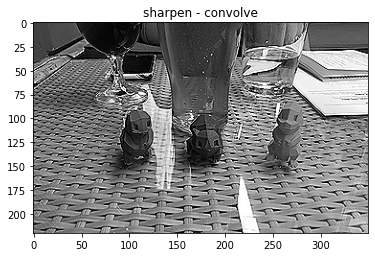

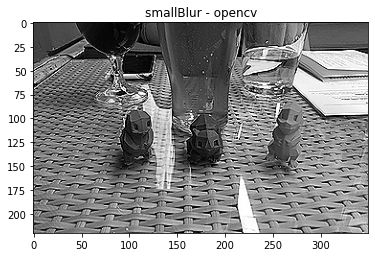

[INFO] applying laplacian kernel


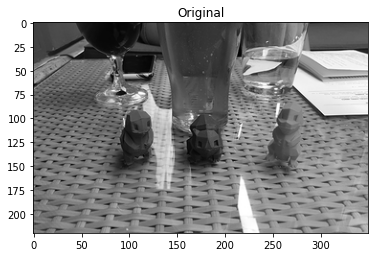

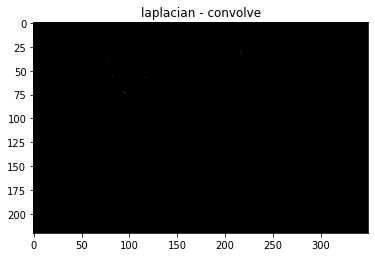

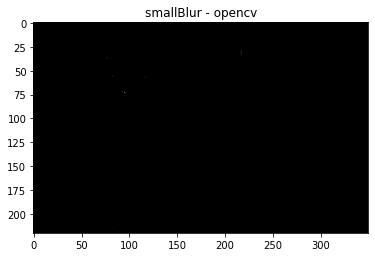

[INFO] applying sobel_x kernel


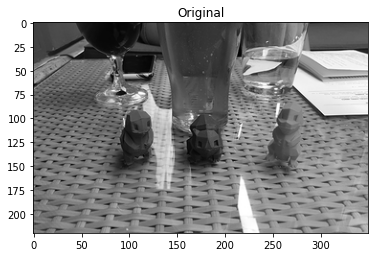

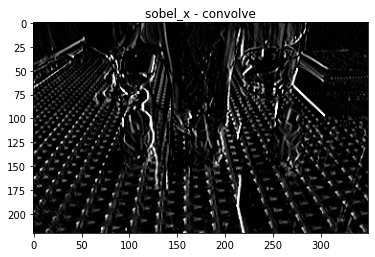

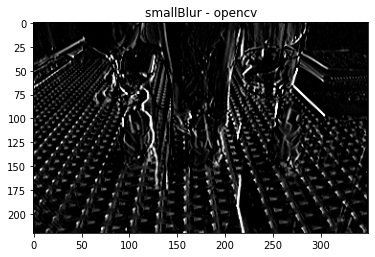

[INFO] applying sobel_y kernel


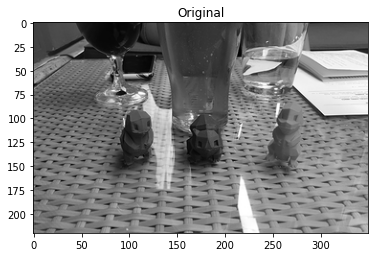

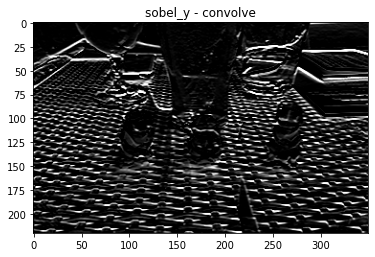

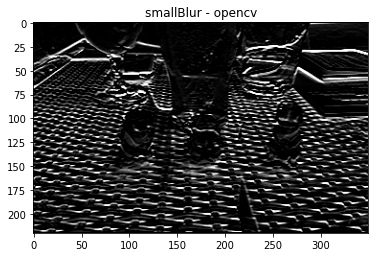

In [ ]:
# loop over the kernels
for (kernelName, kernel) in kernelBank:
  print("[INFO] applying {} kernel".format(kernelName))

  convolveOutput = convolve(gray, kernel)
  opencvOutput = cv2.filter2D(gray, -1, kernel)

  # show the output images
  plt_imshow("Original", gray)
  plt_imshow("{} - convolve".format(kernelName), convolveOutput)
  plt_imshow("{} - opencv".format(kernalName), opencvOutput)

### Image Gradients

In [3]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/image-gradients/image-gradients.zip
!unzip -qq image-gradients.zip
%cd image-gradients

--2021-12-18 11:27:28--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/image-gradients/image-gradients.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.238.57
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.238.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 524887 (513K) [binary/octet-stream]
Saving to: ‘image-gradients.zip’

image-gradients.zip 100%[===================>] 512.58K  1.56MB/s    in 0.3s    

2021-12-18 11:27:29 (1.56 MB/s) - ‘image-gradients.zip’ saved [524887/524887]

/content/image-gradients


In [4]:
args = {
	"image": "images/coins01.png",
    "scharr": 0
}

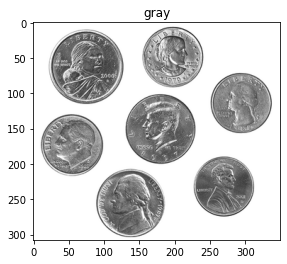

In [5]:
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_imshow("gray", gray)

In [7]:
# set the kernel size, depending on whether we are using the Sobel operator of the Scharr operator, then compute the gradients along
# the x and y axis, respectively
ksize = -1 if args["scharr"] > 0 else 3
gx = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gy= cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

In [8]:
# the gradient magnitude images are now of the floating point data type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate on them and visualize them
gx = cv2.convertScaleAbs(gx)
gy = cv2.convertScaleAbs(gy)

In [10]:
combined = cv2.addWeighted(gx, 0.5, gy, 0.5, 0)

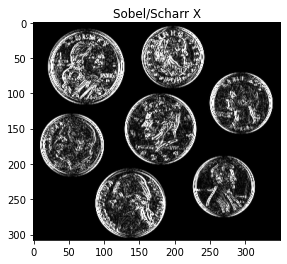

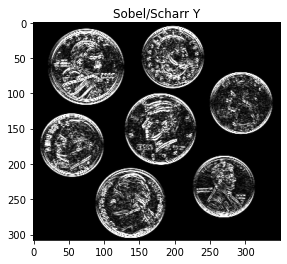

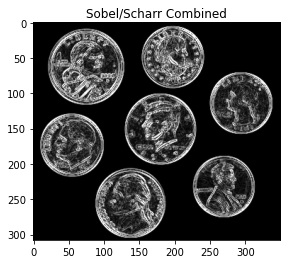

In [12]:
# show our output images
plt_imshow("Sobel/Scharr X", gx)
plt_imshow("Sobel/Scharr Y", gy)
plt_imshow("Sobel/Scharr Combined", combined)

### Computing gradient magnitude and orientation with OpenCV

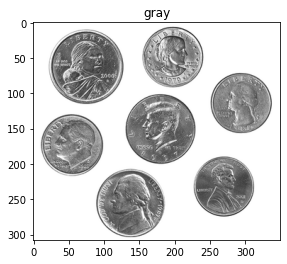

In [14]:
img = cv2.imread(args["image"])
img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt_imshow("gray", img2gray)

In [15]:
gX = cv2.Sobel(img2gray, ddepth = cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(img2gray, ddepth = cv2.CV_64F, dx=0, dy=1)

In [16]:
# compute the gradient magnitude and orientation
magnitude = np.sqrt((gX **2) + (gY**2))
orient = np.arctan2(gY, gX) * (180/np.pi) % 180

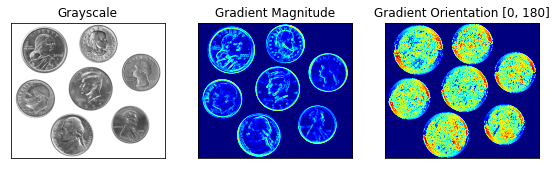

In [24]:
# initialize a figure to display the input grayscale image along with
# the gradient magnitude and orientation representations, respectively
(fig, axs) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
# plot each of the images
axs[0].imshow(gray, cmap="gray")
axs[1].imshow(magnitude, cmap="jet")
axs[2].imshow(orient, cmap="jet")
# set the titles of each axes
axs[0].set_title("Grayscale")
axs[1].set_title("Gradient Magnitude")
axs[2].set_title("Gradient Orientation [0, 180]")

# loop over each of the axes and turn off the x and y ticks
for i in range(0, 3):
	axs[i].get_xaxis().set_ticks([])
	axs[i].get_yaxis().set_ticks([])

# show the plots
plt.tight_layout()
plt.show()

### Edge Detection

In [25]:
% cd ..

/content


In [26]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/canny-edge-detector/canny-edge-detector.zip
!unzip -qq canny-edge-detector.zip
%cd canny-edge-detector

--2021-12-18 12:15:50--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/canny-edge-detector/canny-edge-detector.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.228.113
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.228.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179209 (175K) [binary/octet-stream]
Saving to: ‘canny-edge-detector.zip’

canny-edge-detector 100%[===================>] 175.01K   710KB/s    in 0.2s    

2021-12-18 12:15:50 (710 KB/s) - ‘canny-edge-detector.zip’ saved [179209/179209]

/content/canny-edge-detector


In [27]:
args = {
    "image": "images/coins.png"
}

In [28]:
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gauss = cv2.GaussianBlur(gray, (5,5), 0)

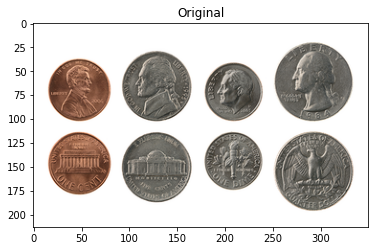

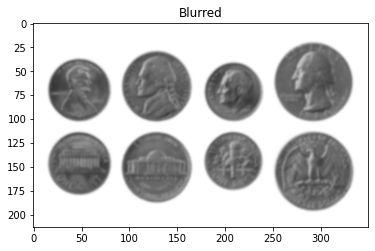

In [30]:
# show the original and blurred images
plt_imshow("Original", image)
plt_imshow("Blurred", gauss)

In [31]:
# compute a "wide", "mid-range", and "tight" threshold for the edges using the Canny edge detector
wide = cv2.Canny(gauss, 10, 200)
mid = cv2.Canny(gauss, 30, 150)
tight = cv2.Canny(gauss, 240, 250)

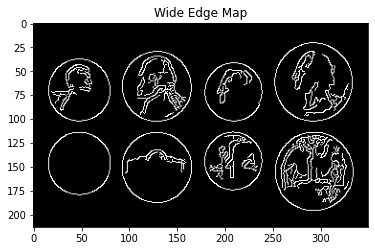

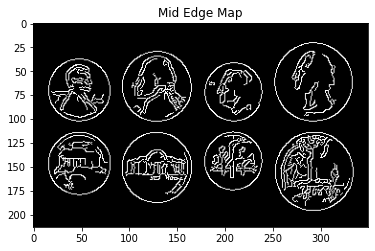

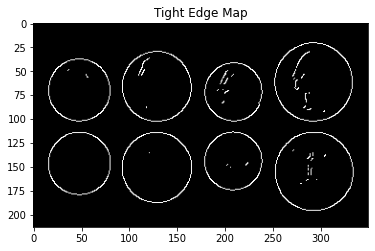

In [32]:
# show the output Canny edge maps
plt_imshow("Wide Edge Map", wide)
plt_imshow("Mid Edge Map", mid)
plt_imshow("Tight Edge Map", tight)

### Automatic Edge Detection

In [33]:
% cd ..

/content


In [34]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/auto-canny/auto-canny.zip
!unzip -qq auto-canny.zip
%cd auto-canny

--2021-12-18 13:25:21--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/auto-canny/auto-canny.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.162.18
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.92.162.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26871 (26K) [binary/octet-stream]
Saving to: ‘auto-canny.zip’

auto-canny.zip      100%[===================>]  26.24K  --.-KB/s    in 0.08s   

2021-12-18 13:25:22 (323 KB/s) - ‘auto-canny.zip’ saved [26871/26871]

/content/auto-canny


In [36]:
def auto_canny(image, sigma=0.33):
  # compute the median of the single channel pixel intensities
  v = np.median(image)
  # apply automatic Canny edge detection using the computed median
  lower = int(min(0, (1-sigma) * v))
  upper = int(max(255, (1+sigma) *v))
  edged = cv2.Canny(image, lower, upper)

  return edged

In [37]:
args = {
	"images": "images"
}

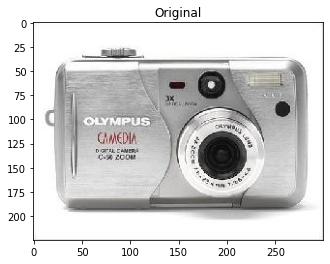

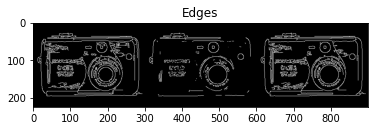

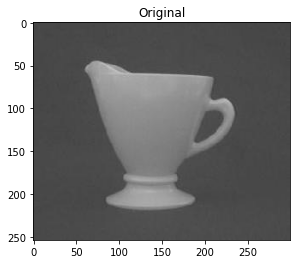

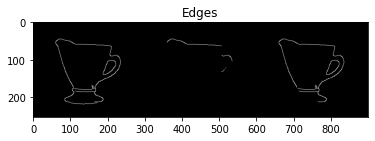

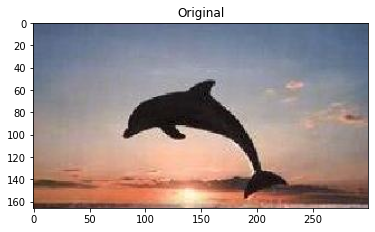

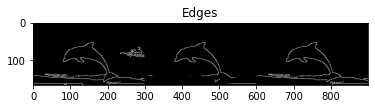

In [41]:
import glob
# loop over the images
for imagePath in glob.glob(args["images"]+ "/*.jpg"):
  # load the image, convert it to grayscale, and blur it slightly
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  gauss = cv2.GaussianBlur(gray, (3, 3), 0)

  # apply Canny edge detection using a wide threshold, tight
	# threshold, and automatically determined threshold
  wide = cv2.Canny(gauss, 10, 200)
  tight = cv2.Canny(gauss, 240, 250)
  auto = auto_canny(gauss)
  # show the images
  plt_imshow("Original", image)
  plt_imshow("Edges", np.hstack([wide, tight, auto]))